In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [6]:
print(tf.__version__)
print(sns.__version__)
print(np.__version__)
print(cv2.__version__)
print(joblib.__version__)

2.17.0
0.13.1
1.26.4
4.10.0
1.4.2


***bold text***
loading mnist data from keras.datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

Shape of the numpy arrays

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# priniting 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

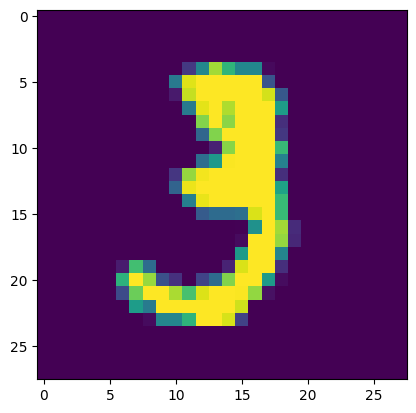

In [ ]:
## we can print image from the above array
img_plot = plt.imshow(x_train[10])
plt.show()

In [ ]:
# displaying the image
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
## we can use these labels or we can apply one hot encoding

### note -- all the images have same dimension in the dataset,if not resize it

In [ ]:
## scaling the values
## i am converting the larger values such as 255 ,234 in small to take less computation tiem

In [ ]:
x_train = x_train/255
x_test = x_test/255
##The visual intensity of the image remains consistent after scaling the pixel values because scaling is linear, preserving the relative differences in pixel values.

In [ ]:
print(x_train[10].shape)

(28, 28)


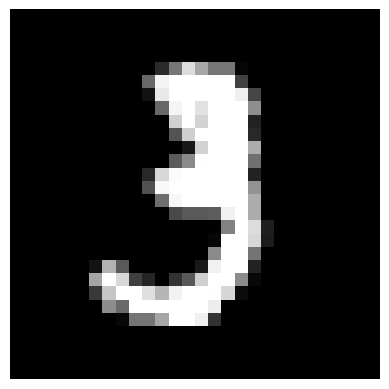

In [ ]:
# img_plot = plt.imshow(x_train[10])
# plt.show()
#In Python, when you use libraries like Matplotlib to display grayscale images, they often apply a colormap by default (e.g., viridis, plasma, etc.), which adds color to the visualization.
plt.imshow(x_train[10], cmap='gray')
plt.axis('off')  # Optional: hides the axis
plt.show()

building the neural netwrok i am using RNN here

In [ ]:
## setting up the layers of the neural network

In [ ]:
 model = keras.Sequential(
     [keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(50,activation ='relu'),
      keras.layers.Dense(50,activation ='relu'),
      keras.layers.Dense(10,activation ='sigmoid'),
      ]
 )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


in the above model , the input images are flatttend into a vector that contains 784 elements,each of the 50 neuron in the first dense layer receive 784 elements and weighted sum is calculated for each node in the first dense layer

In [ ]:
## compiling the neural network
model.compile(optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
             metrics=['accuracy'] )


In [ ]:
## training the neural netwrok
model.fit(x_train,y_train,epochs =10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8471 - loss: 0.5282
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9561 - loss: 0.1483
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9684 - loss: 0.1069
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9738 - loss: 0.0843
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9787 - loss: 0.0684
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9832 - loss: 0.0564
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9863 - loss: 0.0477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0422
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9893 - loss: 0.0362
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0322


Training  data  accuracy =95.24%

**Accuracy on Test Data **

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9669 - loss: 0.1386
0.9706000089645386


Test Data Accuracy = 94.77%

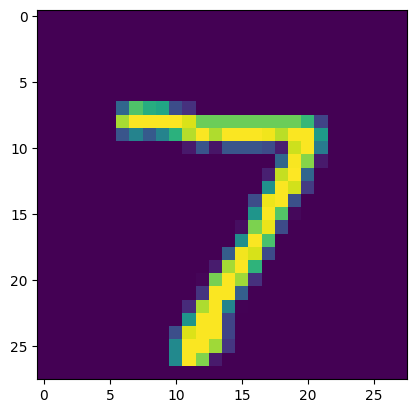

In [ ]:
## first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[4.70749592e-06 4.91903083e-05 2.92696222e-03 9.47108805e-01
 3.33241542e-06 1.15273426e-04 8.46168127e-15 9.99981821e-01
 6.25459943e-03 9.32030380e-01]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
## converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(y_pred[0])
## argmax tells the index of maximum value of arraay
print(label_for_first_test_image)

7


In [ ]:
##converting the prediction proba to class label for all test points
y_for_all = [np.argmax(i) for i in y_pred]
print(y_for_all)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test--> true labels

y_for_all --->predicted labels

Confusion Matrix

In [ ]:

conf = confusion_matrix(y_test,y_for_all)

In [ ]:
print(conf)

tf.Tensor(
[[ 961    0    1    3    1    1    0    1    2   10]
 [   2 1116    0    4    1    0    4    1    5    2]
 [   2    2  987   16    3    0    5    7   10    0]
 [   0    0    3  992    0    2    0    4    1    8]
 [   0    0    0    1  956    0    6    2    1   16]
 [   3    0    0   26    3  840    5    2    3   10]
 [   4    3    1    1    6    7  933    0    2    1]
 [   0    0    6    5    1    0    0  992    1   23]
 [   2    0    2   17    4    4    3    2  930   10]
 [   1    1    0    4   10    1    0    3    1  988]], shape=(10, 10), dtype=int32)


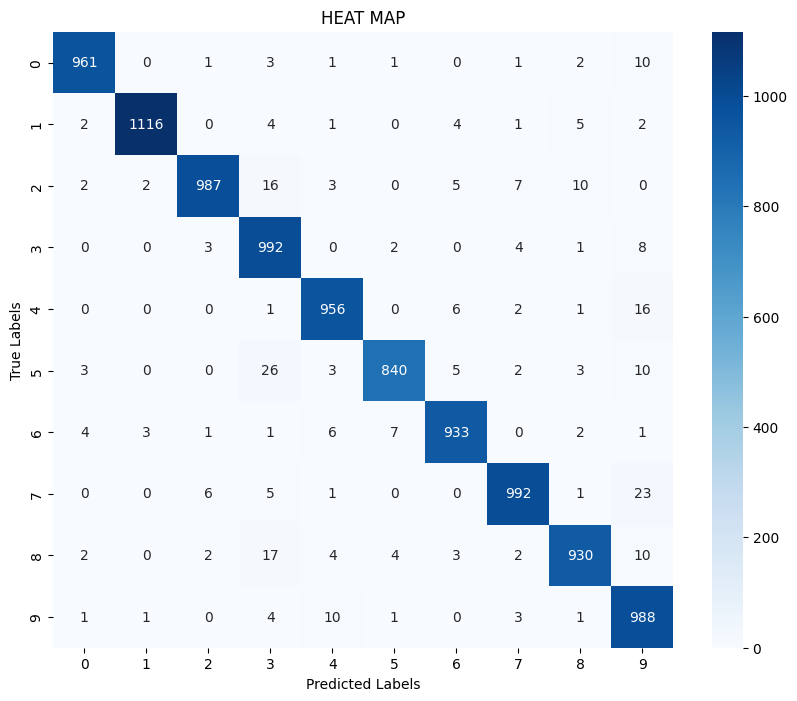

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('HEAT MAP')
plt.show()

Building A Predictive System

In [ ]:
ip='/content/drive/MyDrive/MNIST_digit.png'
ii=cv2.imread(ip)

In [ ]:
type(ii)

numpy.ndarray

In [ ]:
ii.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(ii,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
ii_resize=cv2.resize(grayscale,(28,28))

In [ ]:
ii_resize=ii_resize/255

In [ ]:
## as for predictive model i am using only one image for model so i am doing it
image_reshaped = np.reshape(ii_resize,[1,28,28])
## if it was a rgb image than i would have used [1,28,28,3]

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.8299430e-10 3.5970884e-06 6.5789028e-04 1.0000000e+00 1.1210916e-16
  4.3673426e-06 3.0941582e-24 8.3531803e-03 2.0774307e-03 9.9973720e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


In [5]:
import joblib

In [ ]:
joblib.dump(model,'model_saved_2')

['model_saved_2']

In [ ]:
loaded_model2 = joblib.load('/content/model_saved_2')

In [ ]:
loaded_model2.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


array([[1.8299430e-10, 3.5970884e-06, 6.5789028e-04, 1.0000000e+00,
        1.1210916e-16, 4.3673426e-06, 3.0941582e-24, 8.3531803e-03,
        2.0774307e-03, 9.9973720e-01]], dtype=float32)